## Антагонистическая игра (чистые стратегии)

In [ ]:
import pandas as pd
import copy
from math import *
import os
import numpy as np
import scipy 
from scipy.optimize import linprog

In [ ]:
dlina_mat = int(input('Введите количество стратегий игрока А: '))
shirina_mat = int(input('Введите количество стратегий игрока В: '))
strategya = []
while len(strategya) <= (dlina_mat - 1) :
    nazv = input(f'Введите название стратегии n игрока A: ')
    strategya.append(nazv)
print(strategya)

strategyb = []
while len(strategyb) <= (shirina_mat - 1) :
    nazv2 = input(f'Введите название стратегии n игрока B: ')
    strategyb.append(nazv2)
print(strategyb)

matriz = []
while len(matriz) <= (dlina_mat - 1):
    b = input('Введите количество ожидаемых клиентов по строке n(через запятую): ')
    c = b.split(',')
    c
    for i in range(len(c)):
        c[i] = int(c[i])
    matriz.append(c)

minstrok = [] 
for x in range(dlina_mat):
    minstrok.append(min(matriz[x])) 

maxstolb = []
for x in range(shirina_mat):
    list_val_col = [matriz[i][x] for i in range(dlina_mat)]
    maxstolb.append(max(list_val_col))
df_matrix=pd.DataFrame(matriz, index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=[f'стратегия {i+1}'for i in range(shirina_mat)])
df_min= pd.DataFrame(minstrok, index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=['min'])
df_max= pd.DataFrame([maxstolb], index=['max'], columns=[f'стратегия {i+1}'for i in range(shirina_mat)])
df=copy.deepcopy(df_matrix)
df['min']=df_min
df=df.append(df_max)
display(df)
print(f'\nОптимальная чистая стратегия для игрока А: №{(minstrok.index(max(minstrok)))+1}-{strategya[minstrok.index(max(minstrok))]}\nЦена игры игрока А при выборе чистой оптимальной стратегии: {max(minstrok)}')
print(f'\nОптимальная чистая стратегия для игрока B: №{(maxstolb.index(min(maxstolb)))+1}-{strategyb[maxstolb.index(min(maxstolb))]}\nЦена игры игрока B при выборе чистой оптимальной стратегии: {min(maxstolb)}')
if dlina_mat == shirina_mat: 
    def nash_equilibrium(a): 
        c = np.array([1 for x in range(len(a[0]))]) 
        b = np.array([1 for x in range(len(a))])  
        bounds = [(0, None)] 
        for x in range(len(a[0]) - 1): 
            bounds += [(0, None)]      
        a_T = -np.transpose(a) 
        res = linprog(c, A_ub=a_T, b_ub=-b, bounds=bounds, 
        options={"disp": False}) 
        p = [res.x[i]/(res.fun) for i in range(len(res.x))] 
        strata = []
        for i in range(len(p)): 
            strata.append(round(p[i],2))
        print('\n Таблица смешанных стратегий для игрока А: ')
        df_matrix1=pd.DataFrame([strata], columns=[f'{i}'for i in (strategya)])
        display(df_matrix1)
        print ('Цена игры для игрока А при выборе смешанной оптимальной стратегии:', round(1/(res.fun),2))
        for i in range(len(p)):  
            res = linprog(-c, A_ub=a, b_ub=b, bounds=bounds, 
            options={"disp": False}) 
        q = [res.x[i]/(-res.fun) for i in range(len(res.x))] 
        strata2 = []
        for i in range(len(p)): 
            strata2.append(round(q[i],2))
        print('\n Таблица смешанных стратегий для игрока B: ')
        df_matrix2=pd.DataFrame([strata2], columns=[f'{i}'for i in (strategyb)])
        display(df_matrix2)
        return 
    nash_equilibrium(matriz)
else:
    None

Введите количество стратегий игрока А: 3
Введите количество стратегий игрока В: 3
Введите название стратегии n игрока A: Джинсы
Введите название стратегии n игрока A: Джинсовые юбки
Введите название стратегии n игрока A: Джинсовые платья
['Джинсы', 'Джинсовые юбки', 'Джинсовые платья']
Введите название стратегии n игрока B: Джинсы
Введите название стратегии n игрока B: Джинсовые рубашки
Введите название стратегии n игрока B: Джинсовые шорты
['Джинсы', 'Джинсовые рубашки', 'Джинсовые шорты']
Введите количество ожидаемых клиентов по строке n(через запятую): 20,25,45
Введите количество ожидаемых клиентов по строке n(через запятую): 5,10,20
Введите количество ожидаемых клиентов по строке n(через запятую): 10,15,15


,стратегия 1,стратегия 2,стратегия 3,min
стратегия 1,20,25,45,20.0
стратегия 2,5,10,20,5.0
стратегия 3,10,15,15,10.0
max,20,25,45,NaN



Оптимальная чистая стратегия для игрока А: №1-Джинсы
Цена игры игрока А при выборе чистой оптимальной стратегии: 20

Оптимальная чистая стратегия для игрока B: №1-Джинсы
Цена игры игрока B при выборе чистой оптимальной стратегии: 20

 Таблица смешанных стратегий для игрока А: 


,Джинсы,Джинсовые юбки,Джинсовые платья
0,1.0,0.0,0.0


Цена игры для игрока А при выборе смешанной оптимальной стратегии: 20.0

 Таблица смешанных стратегий для игрока B: 


,Джинсы,Джинсовые рубашки,Джинсовые шорты
0,1.0,0.0,0.0


## Биматричная игра

In [ ]:
!pip install nashpy

  Created wheel for nashpy: filename=nashpy-0.0.21-py3-none-any.whl size=15280 sha256=3eeac131294b7d6e7edd7a6a2e20d3169bc4dfe1ae29f0c0cfbb092d619c8cc8
  Stored in directory: /root/.cache/pip/wheels/02/08/62/cf4fa931e0a317d180936b266169a57f4bb4eb801465bbe8a1
Successfully built nashpy


In [ ]:
import numpy as np
import scipy as sc
import nashpy as nash

In [ ]:

dlina_mat = int(input('Введите количество стратегий игрока А: '))
shirina_mat = int(input('Введите количество стратегий игрока В: '))
strategya = []
while len(strategya) <= (dlina_mat - 1) :
    nazv = input(f'Введите название стратегии n игрока A: ')
    strategya.append(nazv)
print(strategya)

strategyb = []
while len(strategyb) <= (shirina_mat - 1) :
    nazv2 = input(f'Введите название стратегии n игрока B: ')
    strategyb.append(nazv2)
print(strategyb)

matrizA = []
while len(matrizA) <= (dlina_mat - 1):
    b = input('Введите количество ожидаемых клиентов для игрока А по строке n(через запятую): ')
    c = b.split(',')
    c
    for i in range(len(c)):
        c[i] = int(c[i])
    matrizA.append(c)
matrizB = []
while len(matrizB) <= (dlina_mat - 1):
    b = input('Введите количество ожидаемых клиентов по строке n(через запятую): ')
    c = b.split(',')
    c
    for i in range(len(c)):
        c[i] = int(c[i])
    matrizB.append(c)

Введите количество стратегий игрока А: 3
Введите количество стратегий игрока В: 3
Введите название стратегии n игрока A: a
Введите название стратегии n игрока A: б
Введите название стратегии n игрока A: в
['a', 'б', 'в']
Введите название стратегии n игрока B: г
Введите название стратегии n игрока B: д
Введите название стратегии n игрока B: е
['г', 'д', 'е']
Введите количество ожидаемых клиентов для игрока А по строке n(через запятую): 25,10,15
Введите количество ожидаемых клиентов для игрока А по строке n(через запятую): 17,23,10
Введите количество ожидаемых клиентов для игрока А по строке n(через запятую): 12,20,16
Введите количество ожидаемых клиентов по строке n(через запятую): 17,15,12
Введите количество ожидаемых клиентов по строке n(через запятую): 12,15,10
Введите количество ожидаемых клиентов по строке n(через запятую): 10,7,13


In [ ]:
list_eqs=[]
for i in a:
  for x in i:
    x = list(x)
    for e in x:
      list_eqs.append(e.tolist())
df_eqs = pd.DataFrame(list_eqs)
df_eqs

,0,1,2
0,1.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000
3,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000
5,0.000000,0.000000,1.000000
6,0.600000,0.400000,0.000000
7,0.619048,0.380952,0.000000
8,0.375000,0.000000,0.625000
9,0.071429,0.000000,0.928571


In [ ]:
for i in list_eqs:
  print(sum(i))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002


In [59]:
E1 = np.array(matrizA)
E2 = np.array(matrizB)
prisoner_dilemma=nash.Game(E1,E2)
prisoner_dilemma
eqs = prisoner_dilemma.support_enumeration()
a = []
a.append(list(eqs))
print(a)

[[(array([1., 0., 0.]), array([1., 0., 0.])), (array([0., 1., 0.]), array([0., 1., 0.])), (array([0., 0., 1.]), array([0., 0., 1.])), (array([0.6, 0.4, 0. ]), array([0.61904762, 0.38095238, 0.        ])), (array([0.375, 0.   , 0.625]), array([0.07142857, 0.        , 0.92857143])), (array([0.06976744, 0.48837209, 0.44186047]), array([0.28      , 0.32444444, 0.39555556]))]]


/usr/local/lib/python3.7/dist-packages/nashpy/algorithms/support_enumeration.py:196: RuntimeWarning: 
An even number of (6) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


In [53]:
print(prisoner_dilemma)

Bi matrix game with payoff matrices:

Row player:
[[25 10 15]
 [17 23 10]
 [12 20 16]]

Column player:
[[17 15 12]
 [12 15 10]
 [10  7 13]]


In [54]:
row = []
col = []
for g1, g2 in list(prisoner_dilemma.support_enumeration()):
  row_util = np.dot(np.dot(g1, E1), g2)
  col_util = np.dot(np.dot(g1, E2), g2) 
  row.append(row_util)
  col.append(col_util)
print(row)
print(col)

[25.0, 23.0, 16.0, 19.285714285714292, 15.714285714285714, 16.17777777777778]
[17.0, 15.0, 13.0, 15.0, 12.625, 11.465116279069768]


/usr/local/lib/python3.7/dist-packages/nashpy/algorithms/support_enumeration.py:196: RuntimeWarning: 
An even number of (6) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


In [ ]:
type(prisoner_dilemma.support_enumeration())

generator

In [ ]:
x = [i for i in range(0,10)]
type(x)

list

## Игры с природой ( принятие решения в условиях риска)


In [ ]:
import pandas as pd
import copy
from math import *
import os
import numpy as np
import scipy 
from scipy.optimize import linprog

In [ ]:
dlina_mat = int(input('Введите количество стратегий компании А: '))
shirina_mat = int(input('Введите количество состояний природы П: '))
strategycompany = []
while len(strategycompany) <= (dlina_mat - 1) :
    nazv = input(f'Введите название стратегии n компании A: ')
    strategycompany.append(nazv)
print(strategycompany)

strategyp = []
while len(strategyp) <= (shirina_mat - 1) :
    nazv2 = input(f'Введите название состояния природы n: ')
    strategyp.append(nazv2)
print(strategyp)

matriz = []
while len(matriz) <= (dlina_mat - 1):
    bb = input('Введите количество ожидаемых клиентов по строке n(через запятую): ')
    cc = bb.split(',')
    cc
    for i in range(len(cc)):
        cc[i] = int(cc[i])
    matriz.append(cc)
#Список вероятностей для Байеса
dd = input('Введите вектор вероятностей (каждый элемент через запятую): ') 
ver = dd.split(',')
for i in range(len(ver)):
        ver[i] = float(ver[i])
print(ver)
#Список вероятностей ля Лапласа
pi = 1/dlina_mat 
ravnver = []
for i in range(shirina_mat):
        ravnver.append(pi)
print(ravnver)
#расчет средневзвешанного для Лапласа
a1 = np.array(matriz)
b1 = np.array(ravnver)
srvzveshlap = np.sum(a1*b1, axis=1)
srvzveshlap_lst = srvzveshlap.tolist()
#расчет средневзвешанного для Байеса
a = np.array(matriz)
b = np.array(ver)
srvzvesh = np.sum(a*b, axis=1)
srvzvesh_lst = srvzvesh.tolist()

print('\n Оценка по критерию Лапласа: ')
df_matrix3=pd.DataFrame(matriz, index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=[f'состояние {i+1}'for i in range(shirina_mat)])
df_srvzvesh= pd.DataFrame(srvzveshlap_lst,index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=['средневзвешанное'])
df=copy.deepcopy(df_matrix3)
df['средневзвешанное'] = df_srvzvesh
display(df)
print(f'\nОптимальная стратегия компании А по критерию Лапласа: №{(srvzveshlap_lst.index(max(srvzveshlap_lst)))+1}-{strategycompany[srvzveshlap_lst.index(max(srvzveshlap_lst))]}\nЦена игры игрока А при выборе чистой оптимальной стратегии: {max(srvzveshlap_lst)}')
print('\n Оценка по критерию Байеса: ')
df_matrix4=pd.DataFrame(matriz, index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=[f'состояние {i+1}'for i in range(shirina_mat)])
df_srvzvesh2= pd.DataFrame(srvzvesh_lst,index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=['средневзвешанное'])
df=copy.deepcopy(df_matrix4)
df['средневзвешанное'] = df_srvzvesh2
display(df)
print(f'\nОптимальная стратегия компании А по критерию Баеса: №{(srvzvesh_lst.index(max(srvzvesh_lst)))+1}-{strategycompany[srvzvesh_lst.index(max(srvzvesh_lst))]}\nЦена игры игрока А при выборе чистой оптимальной стратегии: {max(srvzvesh_lst)}')

#Гермейер в чистых стратегиях - создание матрицы Гермейера
q = []
for i in matriz:
    x = np.array(i)
    z = np.array(ver)
    c= z*x
    q.append(c.tolist())
#cоздание списка миним значений по строкам матрицы Гермейера
mingerm = []
for x in range(dlina_mat):
    mingerm.append(min(q[x]))
print('\n Матрица Гермейера: ')
df_matrix5=pd.DataFrame(q, index=[f'{i}'for i in (strategycompany)], columns=[f'{i}'for i in (strategyp)])
df_srvzvesh3= pd.DataFrame(mingerm,index=[f'{i}'for i in (strategycompany)], columns=['min'])
df=copy.deepcopy(df_matrix5)
df['min'] = df_srvzvesh3
display(df)
#Для нахождения реальной цены игры в чистых стартегиях определим местонахождение минимаксимума
for i in q:
    for j in i:
        if j == max(mingerm):
            ep = i.index(j)
print(f'\nОптимальная чистая стратегия игрока А по критерию Гермейера: №{(mingerm.index(max(mingerm)))+1}-{strategycompany[mingerm.index(max(mingerm))]}\nЦена игры с оптимальной чистой стратегии по критерию Гермейера: {max(mingerm)}/{max(mingerm)/(ver[ep])}')   

if dlina_mat == shirina_mat:   
    def nash_equilibrium(a): 
        c = np.array([1 for x in range(len(a[0]))]) 
        b = np.array([1 for x in range(len(a))])  
        bounds = [(0, None)] 
        for x in range(len(a[0]) - 1): 
            bounds += [(0, None)] 
        a_T = -np.transpose(a) 
        res = linprog(c, A_ub=a_T, b_ub=-b, bounds=bounds, 
        options={"disp": False}) 
        p = [res.x[i]/(res.fun) for i in range(len(res.x))] 
        strata = []
        for i in range(len(p)): 
            strata.append(round(p[i],2))
        print('\n Таблица оптимальных смешанных стратегий для игрока А по критерию Гермейера: ')
        df_matrix1=pd.DataFrame([strata], columns=[f'{i}'for i in (strategycompany)])
        display(df_matrix1)
        pr = []
        k = 0
        #перемножение вектора получ процентов на матрицу
        for i in matriz:
            x = np.array(i)
            z = np.array(strata[k])
            c = z*x
            pr.append(c.tolist())
            k+=1
        #поиск сумм по столбцам
        sumstl = list(map(sum, zip(*pr)))
        x = np.array(sumstl)
        z = np.array(ver)
        c = z*x
        tsenareal = sum(c)
        print (f'Цена игры для игрока А при выборе смешанной оптимальной стратегии: {round(1/(res.fun),2)} / {tsenareal}')
        return 
    
    nash_equilibrium(q)
else:
    None

Введите количество стратегий компании А: 3
Введите количество состояний природы П: 3
Введите название стратегии n компании A: Джинсы
Введите название стратегии n компании A: Джинсовые юбки
Введите название стратегии n компании A: Джинсовые шорты
['Джинсы', 'Джинсовые юбки', 'Джинсовые шорты']
Введите название состояния природы n: Джинсы
Введите название состояния природы n: Джинсовые платья
Введите название состояния природы n: Джинсовые рубашки
['Джинсы', 'Джинсовые платья', 'Джинсовые рубашки']
Введите количество ожидаемых клиентов по строке n(через запятую): 20,25,45
Введите количество ожидаемых клиентов по строке n(через запятую): 5,10,20
Введите количество ожидаемых клиентов по строке n(через запятую): 10,15,15
Введите вектор вероятностей (каждый элемент через запятую): 0.1,0.4,0.6
[0.1, 0.4, 0.6]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

 Оценка по критерию Лапласа: 


,состояние 1,состояние 2,состояние 3,средневзвешанное
стратегия 1,20,25,45,30.000000
стратегия 2,5,10,20,11.666667
стратегия 3,10,15,15,13.333333



Оптимальная стратегия компании А по критерию Лапласа: №1-Джинсы
Цена игры игрока А при выборе чистой оптимальной стратегии: 30.0

 Оценка по критерию Байеса: 


,состояние 1,состояние 2,состояние 3,средневзвешанное
стратегия 1,20,25,45,39.0
стратегия 2,5,10,20,16.5
стратегия 3,10,15,15,16.0



Оптимальная стратегия компании А по критерию Баеса: №1-Джинсы
Цена игры игрока А при выборе чистой оптимальной стратегии: 39.0

 Матрица Гермейера: 


,Джинсы,Джинсовые платья,Джинсовые рубашки,min
Джинсы,2.0,10.0,27.0,2.0
Джинсовые юбки,0.5,4.0,12.0,0.5
Джинсовые шорты,1.0,6.0,9.0,1.0



Оптимальная чистая стратегия игрока А по критерию Гермейера: №1-Джинсы
Цена игры с оптимальной чистой стратегии по критерию Гермейера: 2.0/20.0

 Таблица оптимальных смешанных стратегий для игрока А по критерию Гермейера: 


,Джинсы,Джинсовые юбки,Джинсовые шорты
0,1.0,0.0,0.0


Цена игры для игрока А при выборе смешанной оптимальной стратегии: 2.0 / 39.0


## Игры с природой ( принятие решения в условиях неопределенности)

In [ ]:
import pandas as pd
import copy
from math import *
import os
import numpy as np
import matplotlib.pyplot as plt

Введите количество стратегий компании А: 3
Введите количество состояний природы П: 4
Введите название стратегии n компании A: Джинсы
Введите название стратегии n компании A: Джинсовые юбки
Введите название стратегии n компании A: Джинсовые платья
['Джинсы', 'Джинсовые юбки', 'Джинсовые платья']
Введите название состояния природы n: Рецессия
Введите название состояния природы n: Стагнация
Введите название состояния природы n: Оживление
Введите название состояния природы n: Подъем
['Рецессия', 'Стагнация', 'Оживление', 'Подъем']
Введите количество ожидаемых клиентов по строке n(через запятую): 35,35,45,50
Введите количество ожидаемых клиентов по строке n(через запятую): 20,25,25,10
Введите количество ожидаемых клиентов по строке n(через запятую): 10,7,10,14


Платежная матрица


,состояние 1,состояние 2,состояние 3,состояние 4,min,max
стратегия 1,35,35,45,50,35,50
стратегия 2,20,25,25,10,10,25
стратегия 3,10,7,10,14,7,14



Оптимальная стратегия игрока А по критерию пессимизма: №3-Джинсовые платья
Цена игры оптимальной стратегии по критерию пессимизма: 7

Оптимальная стратегия игрока А по критерию оптимизма: №1-Джинсы
Цена игры оптимальной стратегии по критерию оптимизма: 50

Оптимальная стратегия игрока А по критерию Вальда:: №1-Джинсы
Цена игры оптимальной стратегии по критерию Вальда: 35

Линейная свертка склонности к риску по критерию Гурвица


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Джинсы,35.0,36.5,38.0,39.5,41.0,42.5,44.0,45.5,47.0,48.5,50.0
Джинсовые юбки,10.0,11.5,13.0,14.5,16.0,17.5,19.0,20.5,22.0,23.5,25.0
Джинсовые платья,7.0,7.7,8.4,9.1,9.8,10.5,11.2,11.9,12.6,13.3,14.0
max,35.0,36.5,38.0,39.5,41.0,42.5,44.0,45.5,47.0,48.5,50.0




Платежная матрица для критерия Сэвиджа


,Рецессия,Стагнация,Оживление,Подъем
Джинсы,35,35,45,50
Джинсовые юбки,20,25,25,10
Джинсовые платья,10,7,10,14
max,35,35,45,50



 Матрица Сэвиджа


,Рецессия,Стагнация,Оживление,Подъем,max
Джинсы,0,0,0,0,0
Джинсовые юбки,15,10,20,40,40
Джинсовые платья,25,28,35,36,36



Оптимальная стратегия игрока А по критерию Сэвиджа: №1-Джинсы
Величина минимальной недополученной прибыли по критерию Сэвиджа: 0


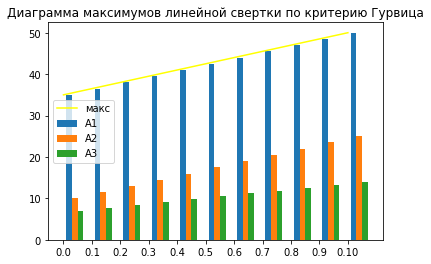

In [ ]:
dlina_mat = int(input('Введите количество стратегий компании А: '))
shirina_mat = int(input('Введите количество состояний природы П: '))
strategycompany = []
while len(strategycompany) <= (dlina_mat - 1) :
    nazv = input(f'Введите название стратегии n компании A: ')
    strategycompany.append(nazv)
print(strategycompany)

strategyp = []
while len(strategyp) <= (shirina_mat - 1) :
    nazv2 = input(f'Введите название состояния природы n: ')
    strategyp.append(nazv2)
print(strategyp)

matriz = []
while len(matriz) <= (dlina_mat - 1):
    bb = input('Введите количество ожидаемых клиентов по строке n(через запятую): ')
    cc = bb.split(',')
    cc
    for i in range(len(cc)):
        cc[i] = int(cc[i])
    matriz.append(cc)
#Минимальное значение по строке матрицы
mingermm = []
for x in range(dlina_mat):
    mingermm.append(min(matriz[x]))  
#Максимальное значение по строке матрицы
maxvalue = []
for x in range(dlina_mat):
    maxvalue.append(max(matriz[x]))
print('\n\nПлатежная матрица')
df_matrix6=pd.DataFrame(matriz, index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=[f'состояние {i+1}'for i in range(shirina_mat)])
df_minn = pd.DataFrame(mingermm,index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=['min'])
df_maxx = pd.DataFrame(maxvalue,index=[f'стратегия {i+1}'for i in range(dlina_mat)], columns=['max'])
df=copy.deepcopy(df_matrix6)
df['min'] = df_minn   
df['max'] = df_maxx
display(df)
print(f'\nОптимальная стратегия игрока А по критерию пессимизма: №{(mingermm.index(min(mingermm)))+1}-{strategycompany[mingermm.index(min(mingermm))]}\nЦена игры оптимальной стратегии по критерию пессимизма: {min(mingermm)}')      
print(f'\nОптимальная стратегия игрока А по критерию оптимизма: №{(maxvalue.index(max(maxvalue)))+1}-{strategycompany[maxvalue.index(max(maxvalue))]}\nЦена игры оптимальной стратегии по критерию оптимизма: {max(maxvalue)}')  
print(f'\nОптимальная стратегия игрока А по критерию Вальда:: №{(mingermm.index(max(mingermm)))+1}-{strategycompany[mingermm.index(max(mingermm))]}\nЦена игры оптимальной стратегии по критерию Вальда: {max(mingermm)}') 
#расчет таблицы Гурвица
alpha_header = [i/10 for i in range(0, 11)]
gurv = []
alfa = 0
while alfa<=1:
    a = []
    for i in range(len(matriz)):
        a.append(alfa*max(matriz[i])+(1-alfa)*min(matriz[i]))
    alfa +=0.1
    gurv.append(a)
df_g = pd.DataFrame(gurv, index = alpha_header, columns = strategycompany)
maxv = df_g.max(axis=1)
df_g['max'] = maxv
df_g = df_g.T #транспонирование матрицы под треб вид
print('\nЛинейная свертка склонности к риску по критерию Гурвица')
display(df_g)


#Построение диаграммы
maxi = maxv.tolist()
df_g1 = pd.DataFrame(gurv, index = alpha_header, columns = strategycompany)
df_g1 = df_g1.T
gurvmatrix = np.asmatrix(df_g1)
fig, ax = plt.subplots()
rects4 = plt.plot(maxi, label = 'макс', color = 'yellow')
k = 1
for i in gurvmatrix:
        a = np.array(i).reshape(-1,).tolist()
        shag = [f"0.{i}" for i in range(11)]
        width = 0.2
        x = np.arange(len(shag)) 
        rects1 = ax.bar(x + width*k, a, width, label=f'A{k}',)
        ax.set_title('Диаграмма максимумов линейной свертки по критерию Гурвица')
        ax.set_xticks(x)
        ax.set_xticklabels(shag)
        ax.legend()
        k+=1
#Критерий Сэвиджа
print('\n\nПлатежная матрица для критерия Сэвиджа')
maxstolb = []
for x in range(shirina_mat):
    list_val_col = [matriz[i][x] for i in range(dlina_mat)]
    maxstolb.append(max(list_val_col))
df_matrix=pd.DataFrame(matriz, index=[f'{i}'for i in (strategycompany)], columns=[f'{i}'for i in (strategyp)])
df_max= pd.DataFrame([maxstolb], index=['max'], columns=[f'{i}'for i in (strategyp)])
df=copy.deepcopy(df_matrix)
df=df.append(df_max)
display(df)
#Матрица Сэвиджа
savagge = []
for i in matriz:
    a = []
    k = 0
    for x in i:
        a.append((maxstolb[k])-x)
        k+=1
    savagge.append(a)

print('\n Матрица Сэвиджа')
maxsavage = []
for x in range(dlina_mat):
    maxsavage.append(max(savagge[x]))  
df_matrix=pd.DataFrame(savagge, index=[f'{i}'for i in (strategycompany)], columns=[f'{i}'for i in (strategyp)])
df_max = pd.DataFrame(maxsavage,index=[f'{i}'for i in (strategycompany)], columns=['max'])
df=copy.deepcopy(df_matrix)
df['max'] = df_max
display(df)
print(f'\nОптимальная стратегия игрока А по критерию Сэвиджа: №{(maxsavage.index(min(maxsavage)))+1}-{strategycompany[maxsavage.index(min(maxsavage))]}\nВеличина минимальной недополученной прибыли по критерию Сэвиджа: {min(maxsavage)}')      